**Classification with Logistic Regression**

In [22]:
import pandas as pd
df = pd.read_csv(r'C:\Users\JEAN JEASEN\Documents\Codveda\Data Set For Task\1) iris.csv')
df.head()


,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [23]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [24]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score

# Encode the categorical target variable
le = LabelEncoder()
df['species_encoded'] = le.fit_transform(df['species'])

# Features and target
X = df.drop(['species', 'species_encoded'], axis=1)
y = df['species_encoded']

# Feature scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)



In [25]:
# Split the data into training and testing sets 
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

# Build and train the Decision Tree Classifier
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)

# Predict and evaluate
y_pred = clf.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred, target_names=le.classes_))

Accuracy: 0.9555555555555556
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        19
  versicolor       1.00      0.85      0.92        13
   virginica       0.87      1.00      0.93        13

    accuracy                           0.96        45
   macro avg       0.96      0.95      0.95        45
weighted avg       0.96      0.96      0.96        45



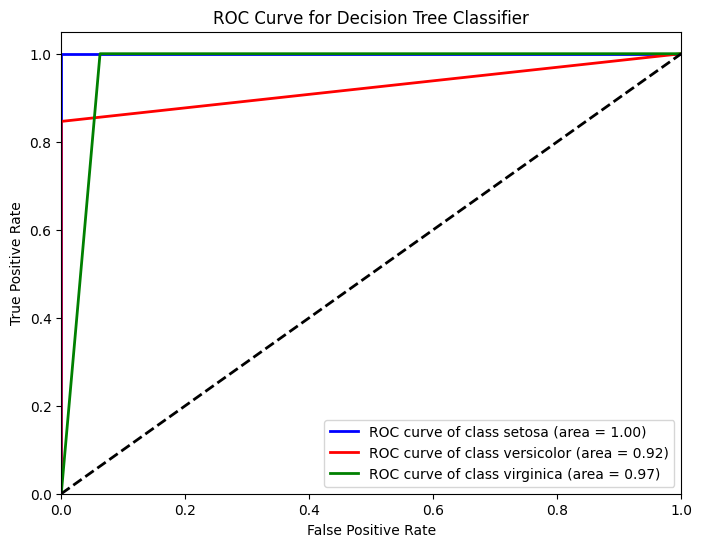

In [26]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize

import matplotlib.pyplot as plt

# Binarize the output for multiclass ROC
y_test_bin = label_binarize(y_test, classes=[0, 1, 2])
y_score = clf.predict_proba(X_test)

fpr = dict()
tpr = dict()
roc_auc = dict()
n_classes = y_test_bin.shape[1]

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curve for each class
plt.figure(figsize=(8, 6))
colors = ['blue', 'red', 'green']
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label=f'ROC curve of class {le.classes_[i]} (area = {roc_auc[i]:0.2f})')

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Decision Tree Classifier')
plt.legend(loc="lower right")
plt.show()

*Train SVM Model*

In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import precision_score, recall_score

# Split the data into training and testing sets (train 70%, test 30%)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)
# Train SVM classifier (with probability=True for ROC curve)
svm_clf = SVC(probability=True, random_state=42)
svm_clf.fit(X_train, y_train)

# Predict
y_pred_svm = svm_clf.predict(X_test)
y_score_svm = svm_clf.predict_proba(X_test)

*Metrics Peformance*

In [31]:
# Metrics
accuracy = accuracy_score(y_test, y_pred_svm)
precision = precision_score(y_test, y_pred_svm, average='macro')
recall = recall_score(y_test, y_pred_svm, average='macro')
print("SVM Accuracy:", accuracy)
print("SVM Precision:", precision)
print("SVM Recall:", recall)
print(classification_report(y_test, y_pred_svm, target_names=le.classes_))

SVM Accuracy: 1.0
SVM Precision: 1.0
SVM Recall: 1.0
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        19
  versicolor       1.00      1.00      1.00        13
   virginica       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



*ROC Curve for SVM*

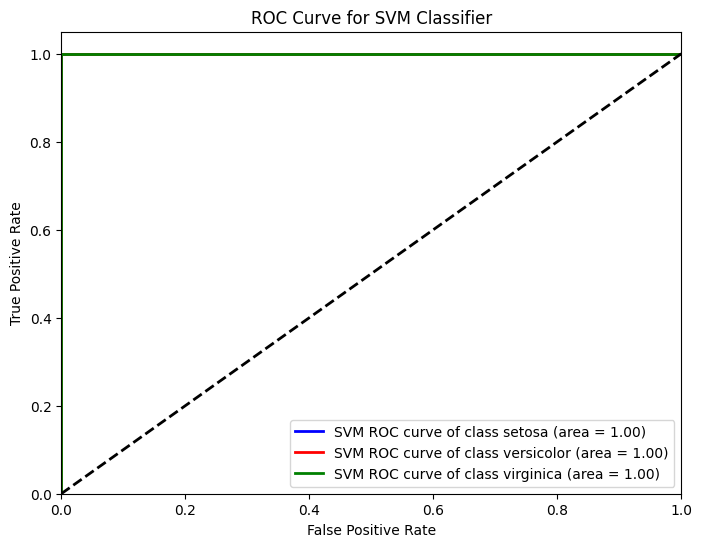

In [32]:
# ROC curve for SVM
fpr_svm = dict()
tpr_svm = dict()
roc_auc_svm = dict()
for i in range(n_classes):
    fpr_svm[i], tpr_svm[i], _ = roc_curve(y_test_bin[:, i], y_score_svm[:, i])
    roc_auc_svm[i] = auc(fpr_svm[i], tpr_svm[i])

plt.figure(figsize=(8, 6))
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr_svm[i], tpr_svm[i], color=color, lw=2,
             label=f'SVM ROC curve of class {le.classes_[i]} (area = {roc_auc_svm[i]:0.2f})')
plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for SVM Classifier')
plt.legend(loc="lower right")
plt.show()

*Comparison Decision Tree VS SVM VS Logistic Regeression*

Logistic Regression Accuracy: 0.9111111111111111
Logistic Regression Precision: 0.9215686274509803
Logistic Regression Recall: 0.8974358974358975
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        19
  versicolor       1.00      0.69      0.82        13
   virginica       0.76      1.00      0.87        13

    accuracy                           0.91        45
   macro avg       0.92      0.90      0.89        45
weighted avg       0.93      0.91      0.91        45



c:\Users\JEAN JEASEN\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(


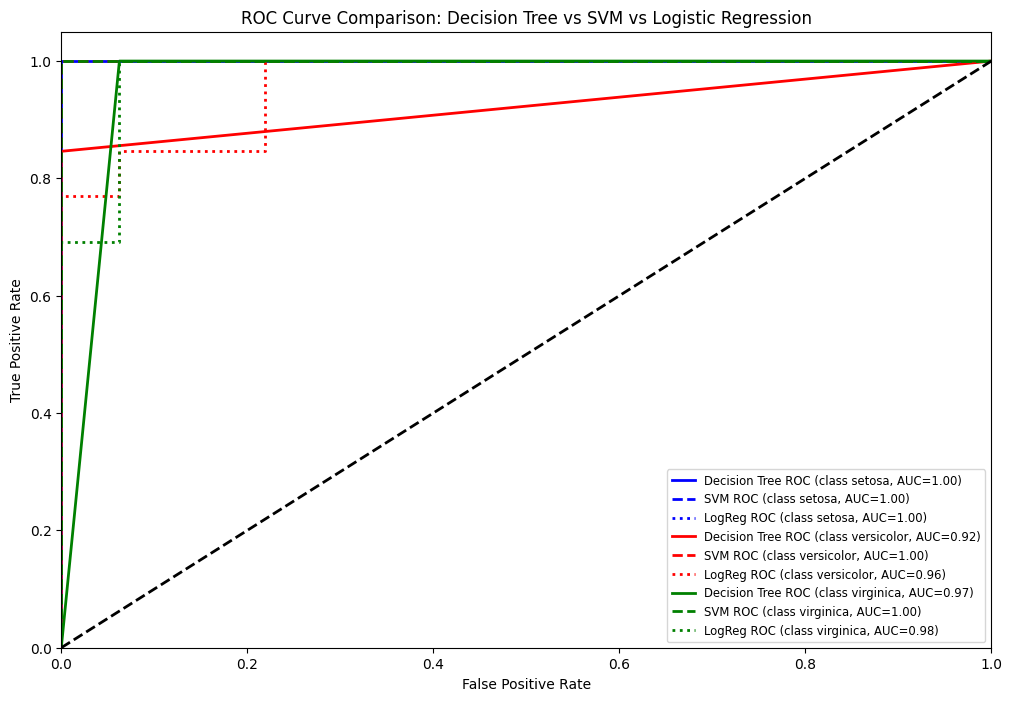

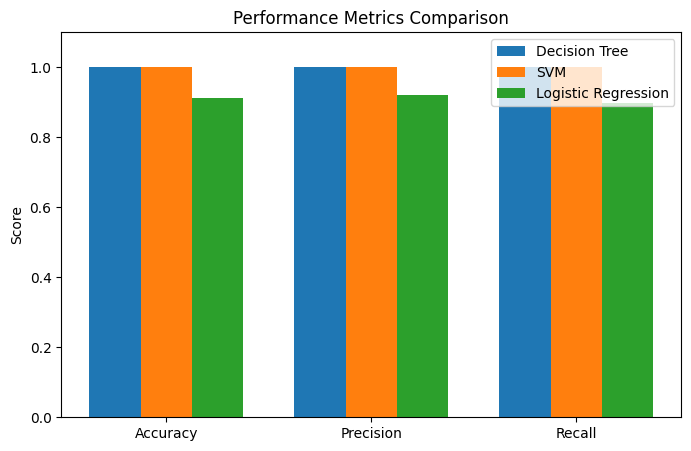

Summary:
Decision Tree: Accuracy=1.00, Precision=1.00, Recall=1.00
SVM: Accuracy=1.00, Precision=1.00, Recall=1.00
Logistic Regression: Accuracy=0.91, Precision=0.92, Recall=0.90


In [37]:
from sklearn.linear_model import LogisticRegression
import numpy as np
from IPython.display import display, HTML

# Train Logistic Regression
logreg = LogisticRegression(multi_class='ovr', solver='lbfgs', max_iter=200, random_state=42)
logreg.fit(X_train, y_train)
y_pred_logreg = logreg.predict(X_test)
y_score_logreg = logreg.predict_proba(X_test)

# Metrics for Logistic Regression
accuracy_logreg = accuracy_score(y_test, y_pred_logreg)
precision_logreg = precision_score(y_test, y_pred_logreg, average='macro')
recall_logreg = recall_score(y_test, y_pred_logreg, average='macro')

print("Logistic Regression Accuracy:", accuracy_logreg)
print("Logistic Regression Precision:", precision_logreg)
print("Logistic Regression Recall:", recall_logreg)
print(classification_report(y_test, y_pred_logreg, target_names=le.classes_))

# ROC curve for Logistic Regression
fpr_logreg = dict()
tpr_logreg = dict()
roc_auc_logreg = dict()
for i in range(n_classes):
    fpr_logreg[i], tpr_logreg[i], _ = roc_curve(y_test_bin[:, i], y_score_logreg[:, i])
    roc_auc_logreg[i] = auc(fpr_logreg[i], tpr_logreg[i])

# Plot ROC curves for all models
plt.figure(figsize=(12, 8))
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, linestyle='-', lw=2,
             label=f'Decision Tree ROC (class {le.classes_[i]}, AUC={roc_auc[i]:.2f})')
    plt.plot(fpr_svm[i], tpr_svm[i], color=color, linestyle='--', lw=2,
             label=f'SVM ROC (class {le.classes_[i]}, AUC={roc_auc_svm[i]:.2f})')
    plt.plot(fpr_logreg[i], tpr_logreg[i], color=color, linestyle=':', lw=2,
             label=f'LogReg ROC (class {le.classes_[i]}, AUC={roc_auc_logreg[i]:.2f})')

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comparison: Decision Tree vs SVM vs Logistic Regression')
plt.legend(loc="lower right", fontsize='small')
plt.show()

# Bar plot for performance metrics

metrics = ['Accuracy', 'Precision', 'Recall']
dt_scores = [accuracy, precision, recall]
svm_scores = [
    accuracy_score(y_test, y_pred_svm),
    precision_score(y_test, y_pred_svm, average='macro'),
    recall_score(y_test, y_pred_svm, average='macro')
]
logreg_scores = [accuracy_logreg, precision_logreg, recall_logreg]

x = np.arange(len(metrics))
width = 0.25

plt.figure(figsize=(8, 5))
plt.bar(x - width, dt_scores, width, label='Decision Tree')
plt.bar(x, svm_scores, width, label='SVM')
plt.bar(x + width, logreg_scores, width, label='Logistic Regression')
plt.xticks(x, metrics)
plt.ylim(0, 1.1)
plt.ylabel('Score')
plt.title('Performance Metrics Comparison')
plt.legend()
plt.show()

# Final conclusion
print("Summary:")
print(f"Decision Tree: Accuracy={accuracy:.2f}, Precision={precision:.2f}, Recall={recall:.2f}")
print(f"SVM: Accuracy={svm_scores[0]:.2f}, Precision={svm_scores[1]:.2f}, Recall={svm_scores[2]:.2f}")
print(f"Logistic Regression: Accuracy={accuracy_logreg:.2f}, Precision={precision_logreg:.2f}, Recall={recall_logreg:.2f}")

# Select best model with accuracy < 1.00 (to avoid overfitting)
model_scores = {
    "Decision Tree": accuracy,
    "SVM": svm_scores[0],
    "Logistic Regression": accuracy_logreg
}
# Filter out models with accuracy == 1.0
filtered_scores = {k: v for k, v in model_scores.items() if v < 1.0}
if filtered_scores:
    best = max(filtered_scores, key=filtered_scores.get)
else:
    best = max(model_scores, key=model_scores.get)

display(HTML(f"<div style='font-size:1.5em; font-weight:bold; color:#ffff; margin-top:20px;'>{'<br>'.join(['Conclusion:', f'Based on the metrics and ROC curves, {best} provides the best classification performance for this flower species dataset.'])}</div>"))